# Geopandas and Geodatasets - Vector Data

Use the latest version of `geopandas`  to test loading of built-in and external map data. 

## Built-in Sources

There are a limited number of representative datasets in the `geodatasets` package. They are useful for training and experimentations.
However, the list is not stable, nor very complete.

## Web Sources

The principal web archive for global-level map data is [Natural Earth](https://www.naturalearthdata.com/). The site proposes
> a public domain map dataset available at 1:10m, 1:50m, and 1:110 million scales. NaturalEarth datasets feature tightly integrated vector and raster data. With Natural Earth you can make a variety of visually pleasing, well-crafted maps with cartography or GIS software.

Natural Earth is very convenient, since it is open source and it
>solves a problem: finding suitable data for making small-scale maps. In a time when the web is awash in geospatial data, cartographers are forced to waste time sifting through confusing tangles of poorly attributed data to make clean, legible maps. Because your time is valuable, Natural Earth data comes ready-to-use.

In [1]:
import geopandas as gpd
import geodatasets

### Load data from built-in datasets

Here we use the built-in, LOW resolution (1:110M) maps of
- countries
- cities
- lakes

Note that we can display the NaturalEarth URL of these datasets, from where they will be automatically downloaded - this avoids having to go to the website itself.

Below, as an exercise, we will also download them directly from [Natural Earth](https://www.naturalearthdata.com/). 

In [2]:
geodatasets.data.flatten().keys()

dict_keys(['geoda.airbnb', 'geoda.atlanta', 'geoda.cars', 'geoda.charleston1', 'geoda.charleston2', 'geoda.chicago_health', 'geoda.chicago_commpop', 'geoda.chile_labor', 'geoda.cincinnati', 'geoda.cleveland', 'geoda.grid100', 'geoda.groceries', 'geoda.guerry', 'geoda.health', 'geoda.health_indicators', 'geoda.hickory1', 'geoda.hickory2', 'geoda.home_sales', 'geoda.houston', 'geoda.juvenile', 'geoda.lansing1', 'geoda.lansing2', 'geoda.lasrosas', 'geoda.liquor_stores', 'geoda.malaria', 'geoda.milwaukee1', 'geoda.milwaukee2', 'geoda.ncovr', 'geoda.natregimes', 'geoda.ndvi', 'geoda.nepal', 'geoda.nyc', 'geoda.nyc_earnings', 'geoda.nyc_education', 'geoda.nyc_neighborhoods', 'geoda.orlando1', 'geoda.orlando2', 'geoda.oz9799', 'geoda.phoenix_acs', 'geoda.police', 'geoda.sacramento1', 'geoda.sacramento2', 'geoda.savannah1', 'geoda.savannah2', 'geoda.seattle1', 'geoda.seattle2', 'geoda.sids', 'geoda.sids2', 'geoda.south', 'geoda.spirals', 'geoda.stlouis', 'geoda.tampa1', 'geoda.us_sdoh', 'ny.bb

In [3]:
geodatasets.data.naturalearth

{'cities': {'url': 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places_simple.zip',
  'license': 'CC0',
  'attribution': 'Natural Earth',
  'name': 'naturalearth.cities',
  'description': 'Point symbols with name attributes of all admin-0 capitals and some other major cities.',
  'geometry_type': 'Point',
  'details': 'https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/',
  'nrows': 243,
  'ncols': 32,
  'hash': '3f3d99a9a5d84605bb3be07b94c9122b4d69d7545de478b314d75f5b0742afdf',
  'filename': 'ne_110m_populated_places_simple.zip'},
 'lakes': {'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_lakes.zip',
  'license': 'CC0',
  'attribution': 'Natural Earth',
  'name': 'naturalearth.lakes',
  'description': 'Major natural and artificial lakes polygons.',
  'geometry_type': 'Polygon',
  'details': 'https://www.naturalearthdata.com/downloads/10m-physical-vectors/10m-lakes/',
  'nrows': 24,
  'ncols': 38,
  'hash': 'f2eed3c738a93010770acb0ba44273ea6a83b053641588bc902d9d6fd1cdafcb',
  'filename': 'ne_110m_lakes.zip'},
 'land': {'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip',
  'license': 'CC0',
  'attribution': 'Natural Earth',
  'name': 'naturalearth.land',
  'description': 'Land polygons including major islands in a 1:110m resolution.',
  'geometry_type': 'Polygon',
  'details': 'https://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-land/',
  'nrows': 127,
  'ncols': 4,
  'hash': '1926c621afd6ac67c3f36639bb1236134a48d82226dc675d3e3df53d02d2a3de',
  'filename': 'ne_110m_land.zip'}}

In [4]:
geodatasets.data.naturalearth.land

{'url': 'https://naciscdn.org/naturalearth/110m/physical/ne_110m_land.zip',
 'license': 'CC0',
 'attribution': 'Natural Earth',
 'name': 'naturalearth.land',
 'description': 'Land polygons including major islands in a 1:110m resolution.',
 'geometry_type': 'Polygon',
 'details': 'https://www.naturalearthdata.com/downloads/110m-physical-vectors/110m-land/',
 'nrows': 127,
 'ncols': 4,
 'hash': '1926c621afd6ac67c3f36639bb1236134a48d82226dc675d3e3df53d02d2a3de',
 'filename': 'ne_110m_land.zip'}

In [5]:
geodatasets.data.naturalearth.cities

{'url': 'https://naciscdn.org/naturalearth/110m/cultural/ne_110m_populated_places_simple.zip',
 'license': 'CC0',
 'attribution': 'Natural Earth',
 'name': 'naturalearth.cities',
 'description': 'Point symbols with name attributes of all admin-0 capitals and some other major cities.',
 'geometry_type': 'Point',
 'details': 'https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/',
 'nrows': 243,
 'ncols': 32,
 'hash': '3f3d99a9a5d84605bb3be07b94c9122b4d69d7545de478b314d75f5b0742afdf',
 'filename': 'ne_110m_populated_places_simple.zip'}

<Axes: >

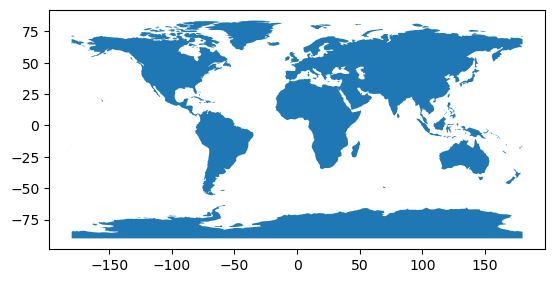

In [20]:
# Load a sample GeoDataFrame using the built-in 
# 'naturalearth land' dataset from 'geodatasets'
gdf = gpd.read_file(geodatasets.get_path('naturalearth land'))

# Plot the GeoDataFrame
gdf.plot()

In [18]:
# Display the first 5 rows of the GeoDataFrame
gdf.head(5)

,featurecla,scalerank,min_zoom,geometry
0,Land,1,1.0,"POLYGON ((-59.57209 -80.04018, -59.86585 -80.5..."
1,Land,1,1.0,"POLYGON ((-159.20818 -79.49706, -161.1276 -79...."
2,Land,1,0.0,"POLYGON ((-45.15476 -78.04707, -43.92083 -78.4..."
3,Land,1,1.0,"POLYGON ((-121.21151 -73.50099, -119.91885 -73..."
4,Land,1,1.0,"POLYGON ((-125.55957 -73.48135, -124.03188 -73..."


**Note**

Notice that this a purely "physical" map, describing land masses only, and does not contain any "cultural" data (country names, population, GDP, etc.). For these details, we require an "adminstrative" map that will be downloaded directly below.

In [21]:
from shapely.geometry import Point

# Define a list of dictionaries with city 
# names and their geographic locations
cities_points = [
    {'name': 'Budapest',    'geometry': Point(19.0402,  47.4979)},
    {'name': 'Vienna',      'geometry': Point(16.3738,  48.2082)},
    {'name': 'Barcelona',   'geometry': Point(2.1734,   41.3851)},
    {'name': 'New York',    'geometry': Point(-74.0060, 40.7128)},
    {'name': 'Los Angeles', 'geometry': Point(-118.243, 34.0522)},
    {'name': 'Helsinki',    'geometry': Point(24.9354,  60.1695)},
    {'name': 'Dublin',      'geometry': Point(-6.2603,  53.3498)},
    {'name': 'London',      'geometry': Point(-0.1278,  51.5074)},
    {'name': 'Manila',      'geometry': Point(120.9842, 14.5995)},
    {'name': 'Amsterdam',   'geometry': Point(4.9041,   52.3676)}
]

# Create a GeoDataFrame from the list of dictionaries
gdf_cities = gpd.GeoDataFrame(cities_points)

# Show the GeoDataFrame
gdf_cities

,name,geometry
0,Budapest,POINT (19.0402 47.4979)
1,Vienna,POINT (16.3738 48.2082)
2,Barcelona,POINT (2.1734 41.3851)
3,New York,POINT (-74.006 40.7128)
4,Los Angeles,POINT (-118.243 34.0522)
5,Helsinki,POINT (24.9354 60.1695)
6,Dublin,POINT (-6.2603 53.3498)
7,London,POINT (-0.1278 51.5074)
8,Manila,POINT (120.9842 14.5995)
9,Amsterdam,POINT (4.9041 52.3676)


<Axes: >

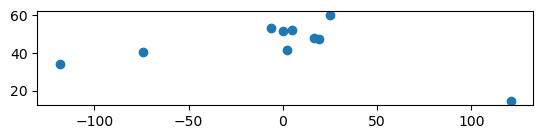

In [22]:
# Create the GeoDataFrame
gdf_cities = gpd.GeoDataFrame(cities_points)

# Plot the original GeoDataFrame
gdf_cities.plot()


In [18]:
gdf.tail(10)

,featurecla,scalerank,min_zoom,geometry
117,Land,1,1.0,"POLYGON ((-95.83029 78.05694, -97.30984 77.850..."
118,Land,1,0.5,"POLYGON ((-100.06019 78.32475, -99.67094 77.90..."
119,Land,0,0.5,"POLYGON ((105.07547 78.30689, 99.43814 77.921,..."
120,Land,0,0.0,"POLYGON ((18.25183 79.70175, 21.54383 78.95611..."
121,Land,0,0.0,"POLYGON ((25.44763 80.40734, 27.40751 80.05641..."
122,Land,1,1.0,"POLYGON ((51.13619 80.54728, 49.79368 80.41543..."
123,Land,0,0.0,"POLYGON ((99.93976 78.88094, 97.75794 78.7562,..."
124,Land,0,0.0,"POLYGON ((-87.02 79.66, -85.81435 79.3369, -87..."
125,Land,0,0.0,"POLYGON ((-68.5 83.10632, -65.82735 83.02801, ..."
126,Land,0,0.0,"POLYGON ((-27.10046 83.51966, -20.84539 82.726..."


## Load Web Data Directly

We use the [Natural Earth](https://www.naturalearthdata.com/) website to find and then downlaod the relevant data.

1. Go to [Natural Earth](https://www.naturalearthdata.com/).
2. Click on "Downloads" where we see 3 classes of data: large, medium and small scale.
3. For the training, we select "Small scale data, 1:110m".
    - Administrative maps are in "Cultural",
    - geographical features are in "Physical".
5. Click on each one and look at what is available.
6. In the "Cultural" section, select and download
   - the "Admin o - Countries" described in the [Readme](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/) (click on "About")
   - the city and town points described in [About](https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-populated-places/)

In [23]:
filename = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

gdf2 = gpd.read_file(filename)

gdf2.head(3)

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


Since we do not need the full 169 columns, we create a filtered dataset with 2 columns only:
- country name
- geometry (polygon)

In [24]:
gdf_countries_filtered = gdf2[['ADMIN', 'geometry']].rename( \
                    columns={'ADMIN': 'country'}).set_index('country')


In [25]:
print("Filtered cities GeoDataFrame:", "\n")
display(gdf_countries_filtered.head(3))


Filtered cities GeoDataFrame: 



,geometry
country,
Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [26]:
filename = "ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"
gdf3 = gpd.read_file(filename)

gdf3.head(3)


,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [27]:
# Filter and prepare the countries GeoDataFrame
#gdf_countries_filtered = gdf[['name', 'geometry']].rename( \
#                    columns={'name': 'country'}).set_index('country')


# Filter and prepare the cities GeoDataFrame
gdf_cities_filtered = gdf_cities[['name', 'geometry']].rename( \
                    columns={'name': 'city'}).set_index('city')

# Display the first 3 rows of the filtered countries GeoDataFrame
print("Filtered countries GeoDataFrame:", "\n")
display(gdf_countries_filtered.head(3))

# Display the first 3 rows of the filtered cities GeoDataFrame
print("Filtered cities GeoDataFrame:", "\n")
display(gdf_cities_filtered.head(3))

# Print the number of entries in the filtered GeoDataFrames
print(f"Number of countries: {len(gdf_countries_filtered)}", "\n")
print(f"Number of cities: {len(gdf_cities_filtered)}", "\n")

Filtered countries GeoDataFrame: 



,geometry
country,
Fiji,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
United Republic of Tanzania,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
Western Sahara,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


Filtered cities GeoDataFrame: 



,geometry
city,
Budapest,POINT (19.0402 47.4979)
Vienna,POINT (16.3738 48.2082)
Barcelona,POINT (2.1734 41.3851)


Number of countries: 177 

Number of cities: 10 

